In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
data = pd.read_csv("C:/Users/PAVILION/Downloads/diabetes_012_health_indicators_BRFSS2015.csv")

In [3]:
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (e.g., impute with mean or mode)
data.fillna(data.mean(), inplace=True)

# Explore data using descriptive statistics
print(data.describe())


Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
5

In [5]:
# Check for duplicate rows
duplicates = data.duplicated()
print(duplicates.sum())

# Remove duplicate rows (if any)
data = data.drop_duplicates()

23899


Outliers in Age: Series([], Name: Age, dtype: float64)


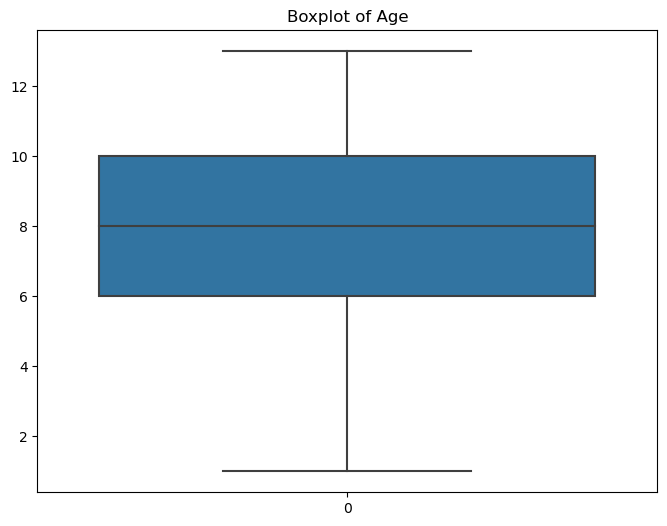

Outliers in BMI: 85        45.0
97        45.0
156       47.0
201       55.0
203       49.0
          ... 
253370    46.0
253382    46.0
253402    49.0
253482    46.0
253675    45.0
Name: BMI, Length: 5638, dtype: float64


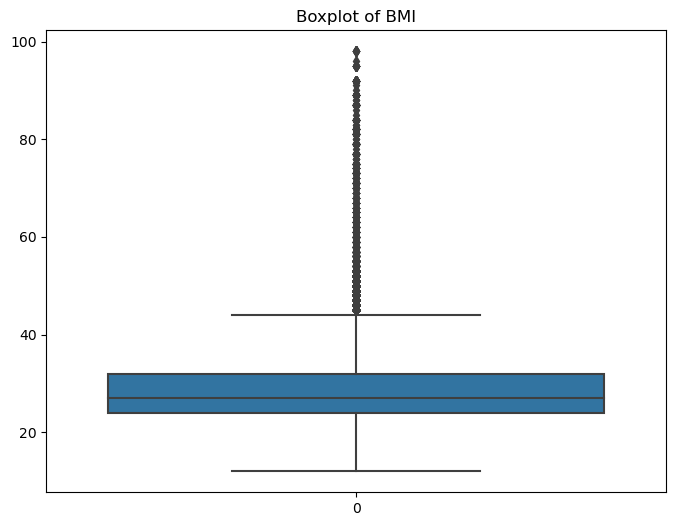

In [6]:
# Numerical columns for outlier detection
numerical_cols = ['Age', 'BMI']

# Function to detect outliers using IQR method
def detect_outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Detect outliers in each numerical column
for col in numerical_cols:
    outliers = detect_outliers_iqr(data[col])
    print(f"Outliers in {col}: {outliers}")

    # Visualize outliers using boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [7]:
print(data.columns)

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


Skewness of BMI: 2.063938014894699


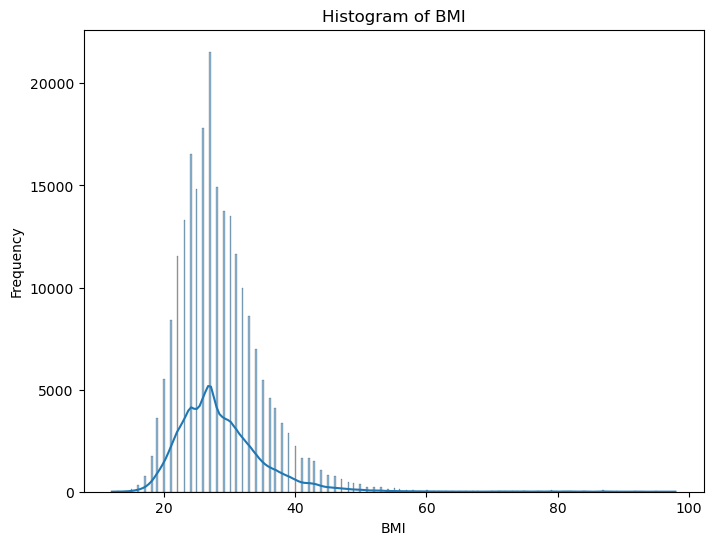

Skewness of Age: -0.38514720011877446


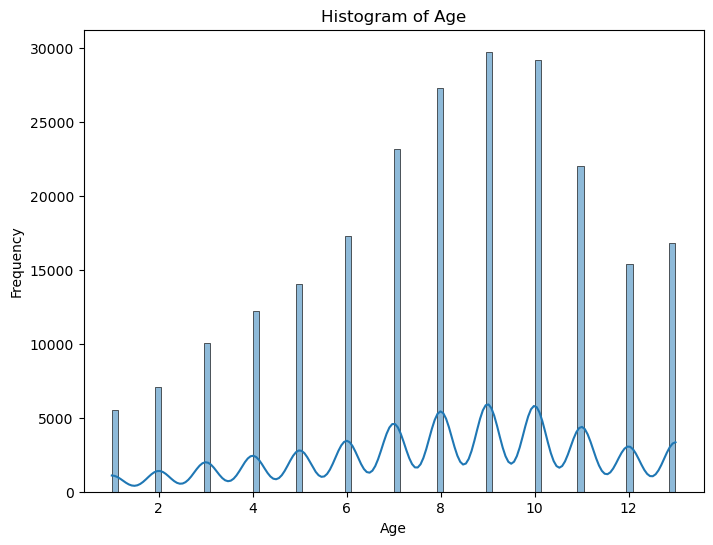

In [8]:
# Numerical columns for skewness check
numerical_cols = ['BMI', 'Age']

# Calculate and print skewness for each numerical column
for col in numerical_cols:
    skewness = data[col].skew()
    print(f"Skewness of {col}: {skewness}")

    # Visualize the distribution using a histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [9]:
import numpy as np

# Assuming 'data' is a Pandas Series or NumPy array
data_log = np.log(data + 1)  # Adding 1 to handle zero values

In [10]:
data_sqrt = np.sqrt(data)

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox



# Identify a skewed feature (e.g., 'Age')
skewness = data['Age'].skew()
print(f"Skewness of Age: {skewness}")

# Apply Box-Cox transformation
data['Age_transformed'], _ = boxcox(data['Age'])

# Check the skewness after transformation
skewness_transformed = data['Age_transformed'].skew()
print(f"Skewness of Age (transformed): {skewness_transformed}")

Skewness of Age: -0.38514720011877446
Skewness of Age (transformed): -0.21455876070301383


C:\Users\PAVILION\AppData\Local\Temp\ipykernel_1896\543037943.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_transformed'], _ = boxcox(data['Age'])


Skewness of Age: -0.38514720011877446
Skewness of Age after transformation: -0.38514720011877446


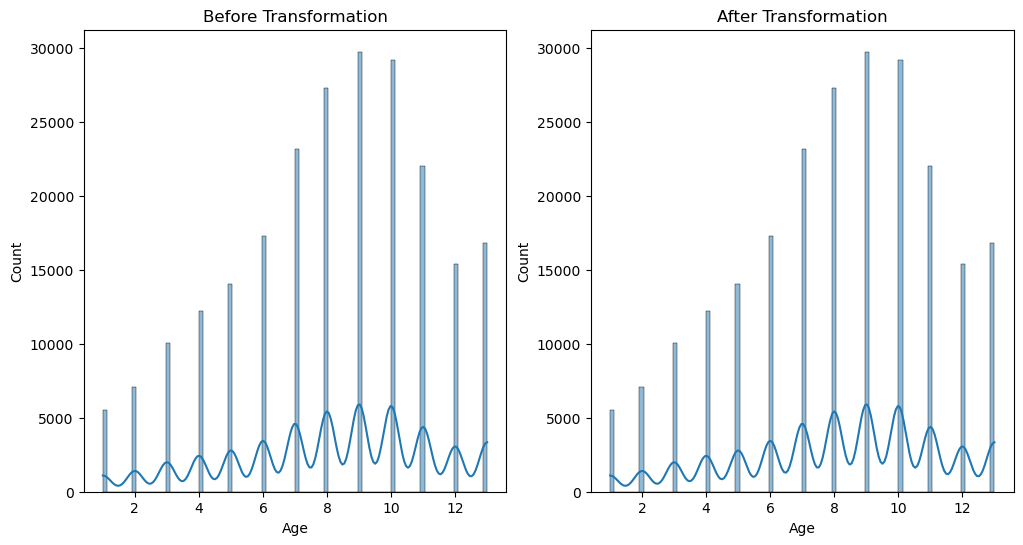

In [12]:


# Numerical column to check for skewness (e.g., 'Age')
column_name = 'Age'

# Check skewness
skewness = data[column_name].skew()
print(f"Skewness of {column_name}: {skewness}")

# Apply logarithmic transformation if skewness is significant
if skewness > 1:  # Adjust the threshold as needed
    data[column_name] = np.log1p(data[column_name])

# Re-check skewness after transformation
skewness_after_transform = data[column_name].skew()
print(f"Skewness of {column_name} after transformation: {skewness_after_transform}")

# Visualize the distribution before and after transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data[column_name], kde=True)
plt.title('Before Transformation')

plt.subplot(1, 2, 2)
sns.histplot(data[column_name], kde=True)
plt.title('After Transformation')

plt.show()

Initial skewness of BMI: 2.063938014894699
Skewness of BMI after log transformation: 0.6375339497416975


C:\Users\PAVILION\AppData\Local\Temp\ipykernel_1896\2597344881.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BMI_log'] = np.log(data['BMI'])


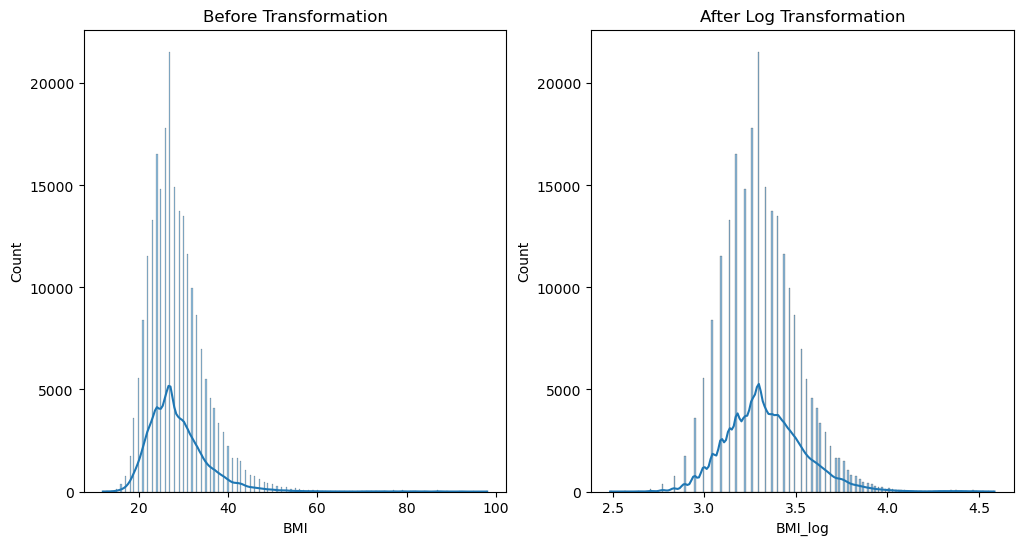

In [13]:


# Check the initial skewness
initial_skewness = data['BMI'].skew()
print(f"Initial skewness of BMI: {initial_skewness}")

# Apply logarithmic transformation
data['BMI_log'] = np.log(data['BMI'])

# Check the skewness after transformation
transformed_skewness = data['BMI_log'].skew()
print(f"Skewness of BMI after log transformation: {transformed_skewness}")

# Visualize the distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['BMI'], kde=True)
plt.title('Before Transformation')

plt.subplot(1, 2, 2)
sns.histplot(data['BMI_log'], kde=True)
plt.title('After Log Transformation')

plt.show()

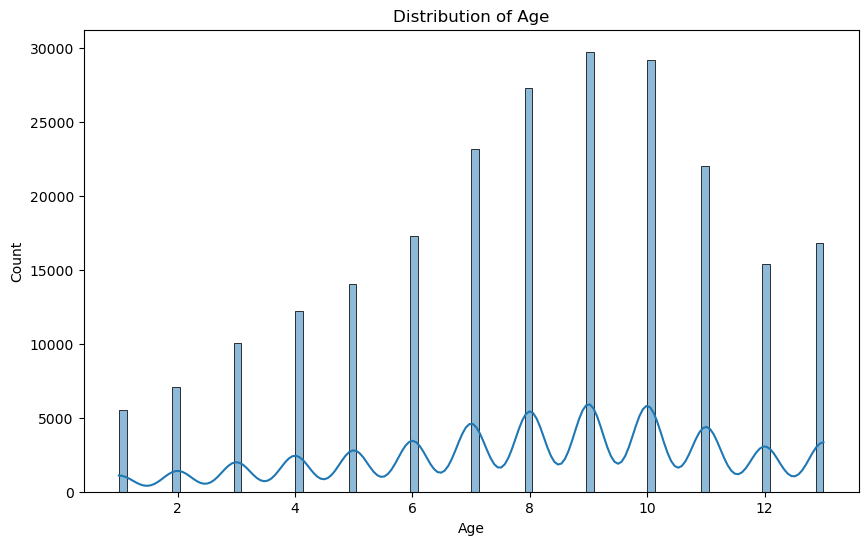

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

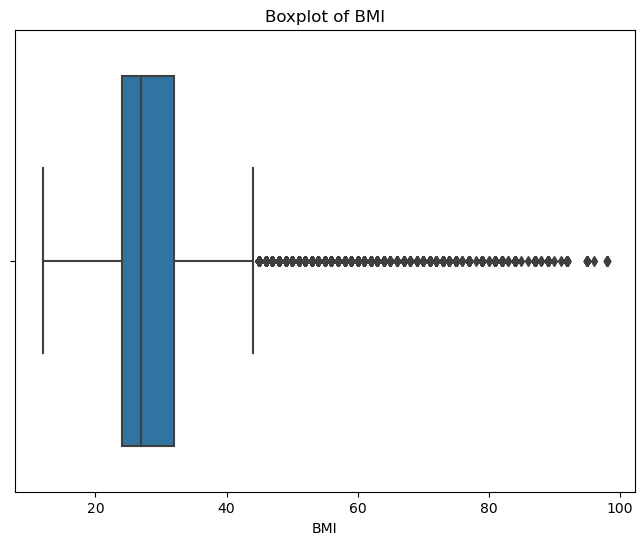

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['BMI'])
plt.title('Boxplot of BMI')
plt.show()

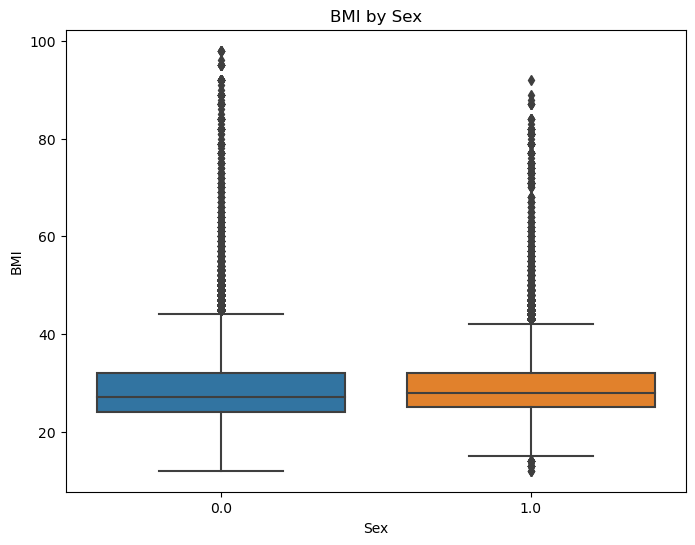

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='BMI', data=data)
plt.title('BMI by Sex')
plt.show()

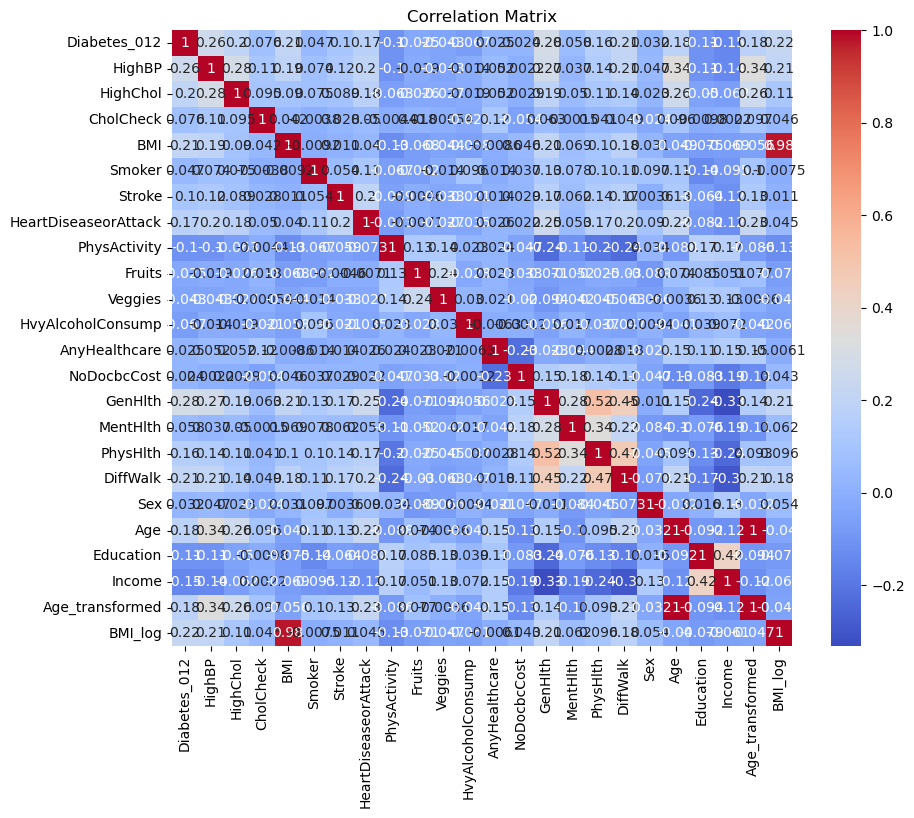

In [17]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

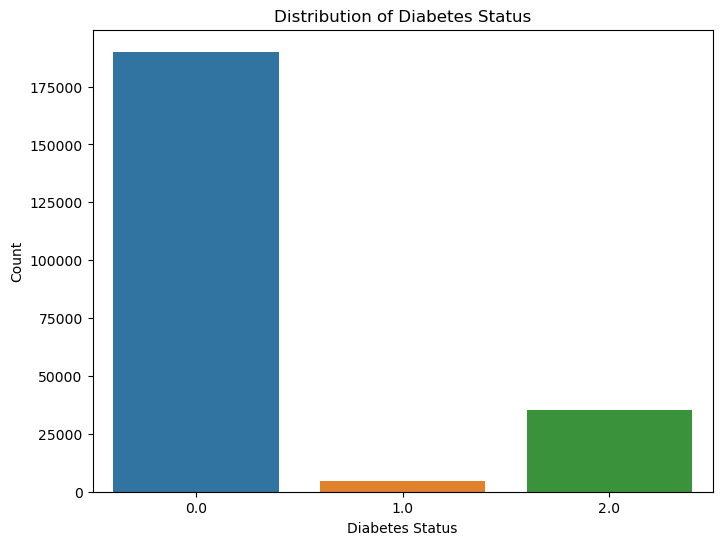

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', data=data)
plt.title('Distribution of Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.show()

C:\Users\PAVILION\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


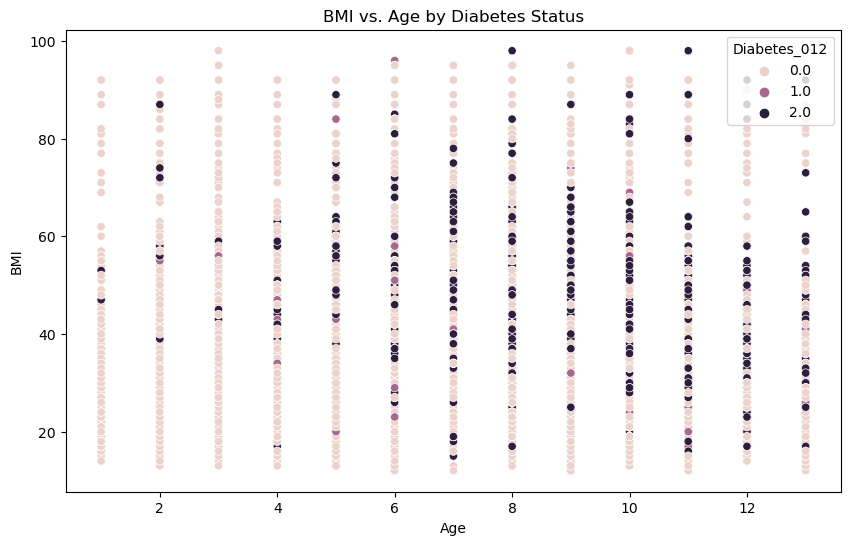

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BMI', data=data, hue='Diabetes_012')
plt.title('BMI vs. Age by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

In [20]:
# Split the data into features (X) and target variable (y)
X = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select the top 10 features using f_classif
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selector.get_support()]

# Create new DataFrames with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [21]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

In [22]:
X_standardized = (X - mean) / std

In [23]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'